In [3]:
#pip install matplotlib
#pip3 install seaborn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
root_path = '/Users/lpwilson/Ada/Developer/projects/Capstone/EEO1s/'
#read in the long format csv
EEO1_data = pd.read_csv(root_path + 'long_csv.csv')

In [15]:
EEO1_data = pd.DataFrame(EEO1_data)
EEO1_data = EEO1_data.drop(columns = ['Unnamed: 0'])
#EEO1_data.info()
#EEO1_data

# goal: 
make a line plot filtered by company and job category that tracks gender (or race) 
as a percentage of total employees in that category over years. 

so, the x-axis points will be the year values
and the y-axis points will be the percentage of employees of each gender.

let's try to get the x- and y- values that we need. 

In [24]:
#set up the filters
company = "Amazon"
#I want to only look at some job categories for now, for readability.
job_cats = ['Exec/Sr. Officials & Mgrs']
##job_categories = ['Exec/Sr. Officials & Mgrs','First/Mid Officials & Mgrs','Professionals','Technicians','Sales Workers','Administrative Support','Craft Workers','Operatives','Laborers & Helpers','Service Workers']

#choosing these names to match our queries.
sortBy1 = 'job_category'
sortBy2 = 'gender'

amz_data = EEO1_data.query(f"company == '{company}'")
# years = sorted(amz_data['year'].unique())
# years
amz_data

,count_employees,job_category,gender,race,year,company
560,106,Exec/Sr. Officials & Mgrs,Male,Hispanic or Latino,2021,Amazon
561,5192,First/Mid Officials & Mgrs,Male,Hispanic or Latino,2021,Amazon
562,4785,Professionals,Male,Hispanic or Latino,2021,Amazon
563,1240,Technicians,Male,Hispanic or Latino,2021,Amazon
564,9819,Sales Workers,Male,Hispanic or Latino,2021,Amazon
...,...,...,...,...,...,...
975,612,Administrative Support,Female,Two or More Races,2019,Amazon
976,3,Craft Workers,Female,Two or More Races,2019,Amazon
977,453,Operatives,Female,Two or More Races,2019,Amazon
978,6107,Laborers & Helpers,Female,Two or More Races,2019,Amazon


Now let's try to get the y-values for one of the job categories.
we want the sum of count_employees for a given job category and gender.

Let's also filter (query) by the job cats we want.

In [25]:

dbl_qry_amz = amz_data.query('job_category.isin(@job_cats)').groupby(["year", sortBy1, sortBy2])['count_employees'].sum()
dbl_qry_amz = pd.DataFrame(dbl_qry_amz)
dbl_qry_amz


count_employees
year job_category              gender                 
2019 Exec/Sr. Officials & Mgrs Female              475
                               Male               1638
2020 Exec/Sr. Officials & Mgrs Female              629
                               Male               1981
2021 Exec/Sr. Officials & Mgrs Female              792
                               Male               2283

[[<matplotlib.axis.XTick at 0x113f2f160>,

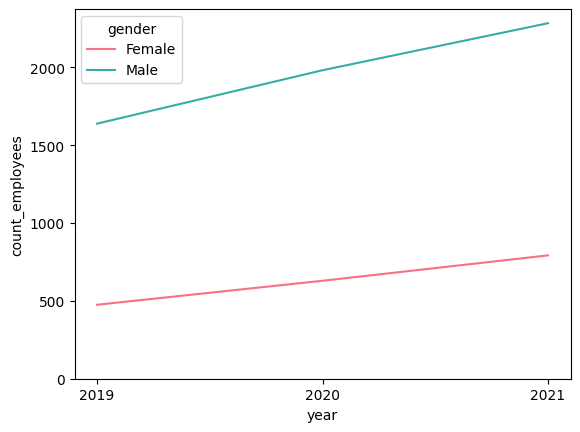

In [31]:
plot1 = sns.lineplot(data = dbl_qry_amz, x='year', y='count_employees', hue = 'gender', palette="husl")
plt.ylim(0)
plot1.set(xticks=[2019, 2020, 2021])

In [10]:
# fig, ax = plt.subplots()
# ax.plot(dbl_qry_amz)